In [2]:
import pandas as pd
import numpy as np

In [3]:
titanic = pd.read_csv('/content/drive/MyDrive/Datasets/titanic.csv')

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [7]:
titanic=titanic.drop(["deck","embark_town","alive","who","alone","class","adult_male"],axis=1)
titanic=titanic.dropna(subset=["embarked"])

In [8]:
titanic["age"] = titanic["age"].fillna(np.mean(titanic.age))

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
titanic.iloc[:, 2] = labelencoder.fit_transform(titanic.iloc[:, 2].values)
titanic.iloc[:, 7] = labelencoder.fit_transform(titanic.iloc[:, 7].values)

In [10]:
titanic.describe()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.642093,0.524184,0.382452,32.096681,1.535433
std,0.486260,0.834700,0.477538,12.968346,1.103705,0.806761,49.697504,0.792088
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,29.642093,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [11]:
titanic.shape

(889, 8)

In [12]:
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


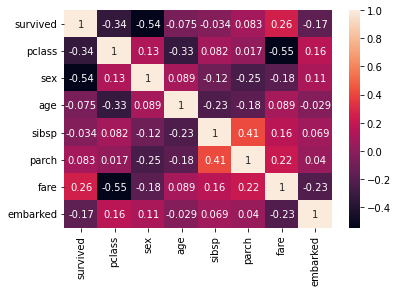

In [67]:
import seaborn as sns
sns.heatmap(titanic.corr(),annot=True)


In [68]:
titanic.corr()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
survived,1.000000,-0.335549,-0.541585,-0.074513,-0.034040,0.083151,0.255290,-0.169718
pclass,-0.335549,1.000000,0.127741,-0.328256,0.081656,0.016824,-0.548193,0.164681
sex,-0.541585,0.127741,1.000000,0.089339,-0.116348,-0.247508,-0.179958,0.110320
age,-0.074513,-0.328256,0.089339,1.000000,-0.231908,-0.178013,0.088780,-0.028659
sibsp,-0.034040,0.081656,-0.116348,-0.231908,1.000000,0.414542,0.160887,0.068900
parch,0.083151,0.016824,-0.247508,-0.178013,0.414542,1.000000,0.217532,0.040449
fare,0.255290,-0.548193,-0.179958,0.088780,0.160887,0.217532,1.000000,-0.226311
embarked,-0.169718,0.164681,0.110320,-0.028659,0.068900,0.040449,-0.226311,1.000000


In [13]:
X = titanic.iloc[:, 1:8].values
Y = titanic.iloc[:, 0].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Linear SVC

In [45]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

x_train_pred = linear_svc.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, x_train_pred)
print(training_data_accuracy)

x_test_pred = linear_svc.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, x_test_pred)
print(testing_data_accuracy)

MSE=mean_squared_error(Y_test,x_test_pred)
print(MSE)

print('coefficients : \n',linear_svc.coef_)

0.8213783403656821
0.7191011235955056
0.2808988764044944
coefficients : 
 [[-0.29282523 -0.53420323 -0.22406039 -0.13181936 -0.0439003   0.04872711
  -0.08961855]]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

x_train_pred = logreg.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, x_train_pred)
print(training_data_accuracy)

x_test_pred = logreg.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, x_test_pred)
print(testing_data_accuracy)

MSE=mean_squared_error(Y_test,x_test_pred)
print(MSE)

print('coefficients : \n',linear_svc.coef_)

0.819971870604782
0.7134831460674157
0.28651685393258425
coefficients : 
 [[-0.29282523 -0.53420323 -0.22406039 -0.13181936 -0.0439003   0.04872711
  -0.08961855]]


Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, Y_train)

x_train_pred = decisiontree.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, x_train_pred)
print(training_data_accuracy)

x_test_pred = decisiontree.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, x_test_pred)
print(testing_data_accuracy)

MSE=mean_squared_error(Y_test,x_test_pred)
print(MSE)

print('coefficients : \n',linear_svc.coef_)

0.9845288326300985
0.7808988764044944
0.21910112359550563
coefficients : 
 [[-0.29282523 -0.53420323 -0.22406039 -0.13181936 -0.0439003   0.04872711
  -0.08961855]]


Random Forest Classifier


In [48]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, Y_train)

x_train_pred = forest.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, x_train_pred)
print(training_data_accuracy)

x_test_pred = forest.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, x_test_pred)
print(testing_data_accuracy)

MSE=mean_squared_error(Y_test,x_test_pred)
print(MSE)

print('coefficients : \n',linear_svc.coef_)

0.9845288326300985
0.7584269662921348
0.24157303370786518
coefficients : 
 [[-0.29282523 -0.53420323 -0.22406039 -0.13181936 -0.0439003   0.04872711
  -0.08961855]]


Gradient Boosting Classifier

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_train, Y_train)

x_train_pred = gbk.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, x_train_pred)
print(training_data_accuracy)

x_test_pred = gbk.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, x_test_pred)
print(testing_data_accuracy)

MSE=mean_squared_error(Y_test,x_test_pred)
print(MSE)

print('coefficients : \n',linear_svc.coef_)

0.9170182841068917
0.7247191011235955
0.2752808988764045
coefficients : 
 [[-0.29282523 -0.53420323 -0.22406039 -0.13181936 -0.0439003   0.04872711
  -0.08961855]]
